<a href="https://colab.research.google.com/github/Deep7285/git-practice/blob/master/Dummy_forecast_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Generate Sample Data (Sales with Trend and Seasonality)
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='ME')
trend = np.linspace(100, 250, len(dates))
seasonal = 50 * np.sin(2 * np.pi * np.arange(len(dates)) / 12)  # Yearly seasonality
noise = np.random.normal(0, 20, len(dates))
sales = trend + seasonal + noise
data = pd.Series(sales, index=dates)

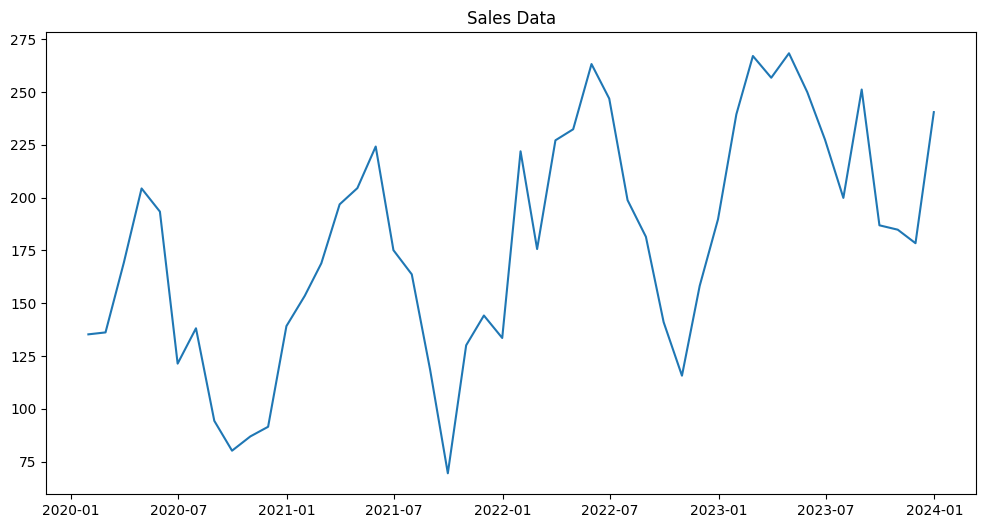

In [ ]:
# 2. Visualize and Check for Stationarity
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Sales Data')
plt.show()

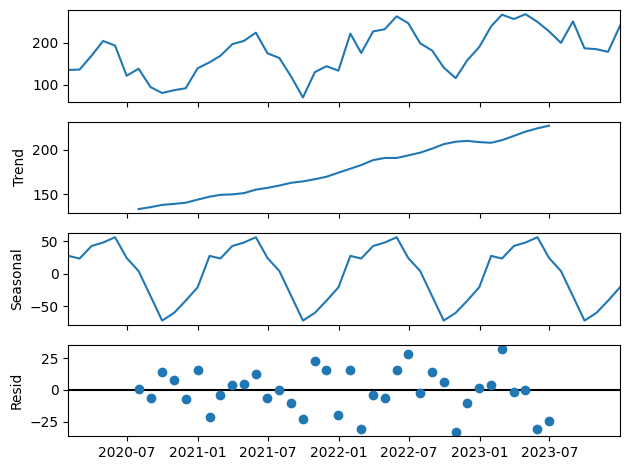

In [ ]:
# Decompose to see trend and seasonality
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()


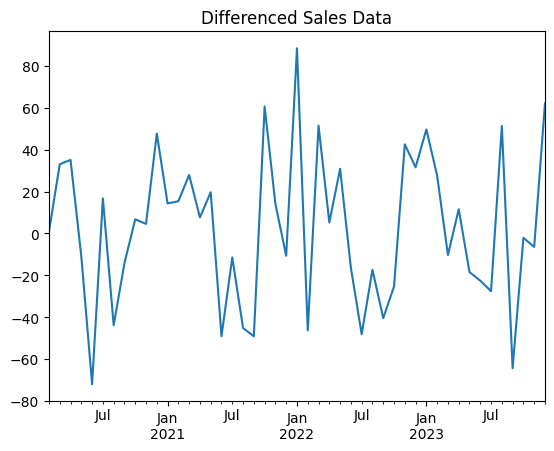

In [ ]:
# In this example, we'll difference once to remove the trend
data_diff = data.diff().dropna()  # .dropna() removes the first NaN value after differencing
data_diff.plot()
plt.title('Differenced Sales Data')
plt.show()


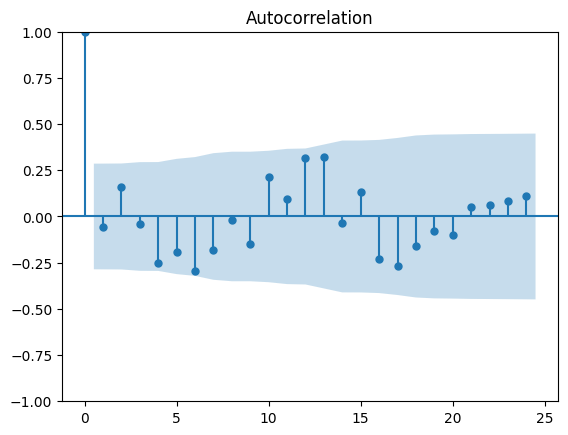

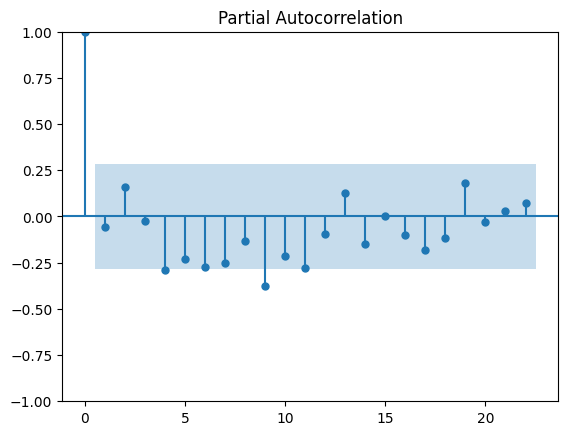

In [ ]:
# 5. ACF and PACF Plots (Crucial for ARIMA/SARIMA Order Selection)
plot_acf(data_diff, lags=24)  # Check for significant autocorrelations
plt.show()
plot_pacf(data_diff, lags=22)  # Check for significant partial autocorrelations
plt.show()

In [ ]:
# 6. ARIMA Model (If data is stationary after differencing)
# Based on ACF/PACF, let's assume p=1, d=1, q=1 (this is a simplification; you'd analyze the plots carefully)
model_arima = ARIMA(data, order=(1, 1, 1)) # Original data is used for ARIMA, as 'd' is handled internally
results_arima = model_arima.fit()


In [ ]:
# 7. SARIMA Model (Handles Seasonality Directly)
# Based on decomposition and ACF/PACF, let's assume (p,d,q)=(1,1,1) and (P,D,Q,s)=(1,0,1,12) for monthly seasonality
model_sarima = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
results_sarima = model_sarima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
# 8. Forecast
forecast_steps = 24  # Forecast for the next 24 months
forecast_arima = results_arima.get_forecast(steps=forecast_steps)
forecast_sarima = results_sarima.get_forecast(steps=forecast_steps)

In [ ]:
# 9. Evaluate (on a held-out test set - crucial for real-world scenarios)
# In this simplified example, we'll evaluate on the last 24 months of the data
actual = data[-forecast_steps:]
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima.predicted_mean))
rmse_sarima = np.sqrt(mean_squared_error(actual, forecast_sarima.predicted_mean))
print(f"ARIMA RMSE: {rmse_arima}")
print(f"SARIMA RMSE: {rmse_sarima}")

ARIMA RMSE: 47.419484761200806
SARIMA RMSE: 57.670249216570596


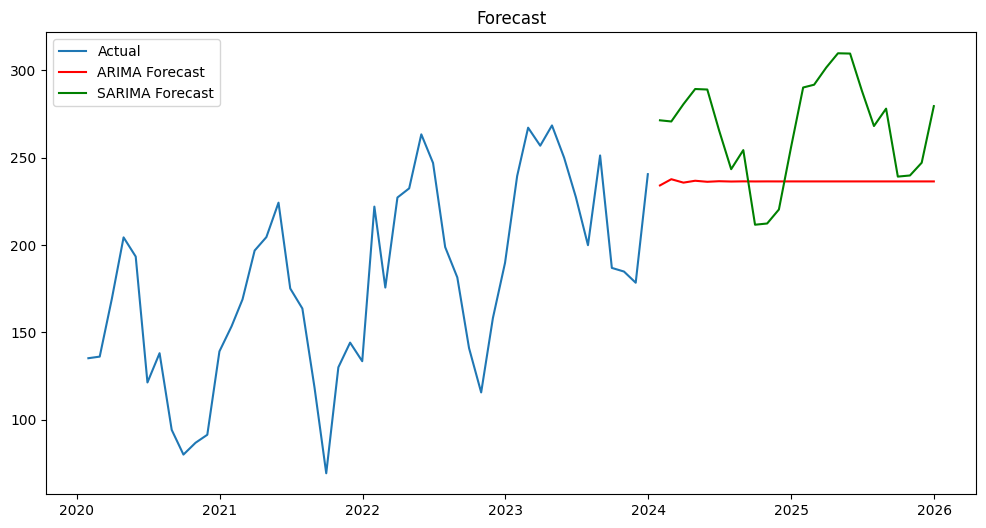

In [ ]:
# 10. Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(forecast_arima.predicted_mean, label='ARIMA Forecast', color='red')
plt.plot(forecast_sarima.predicted_mean, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('Forecast')
plt.show()